In [93]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sympy import *
init_printing()

# 1. Systemklassifikation.

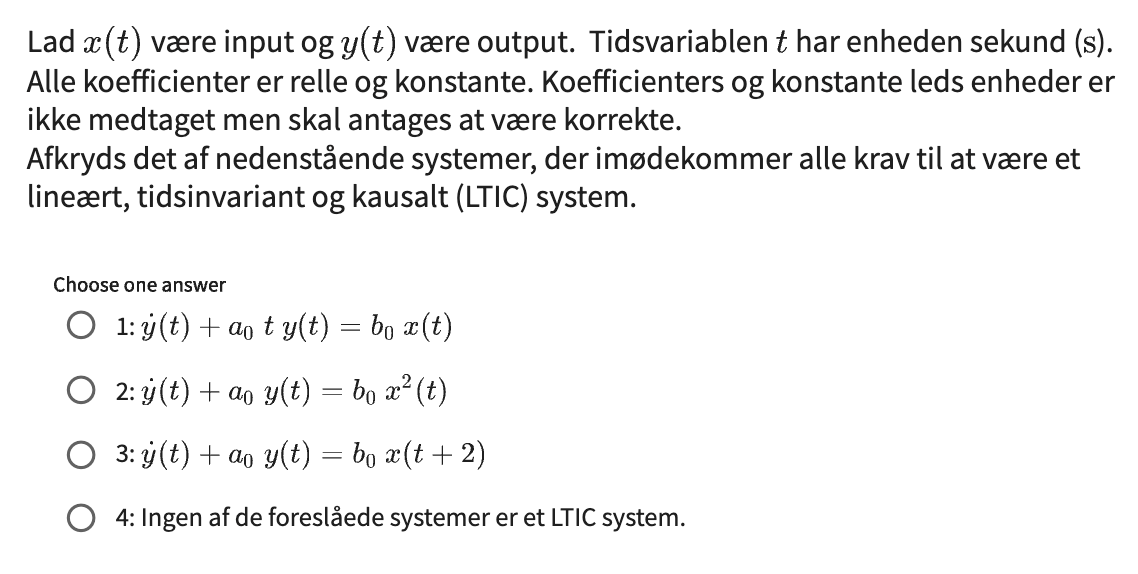

## LTIC definitions

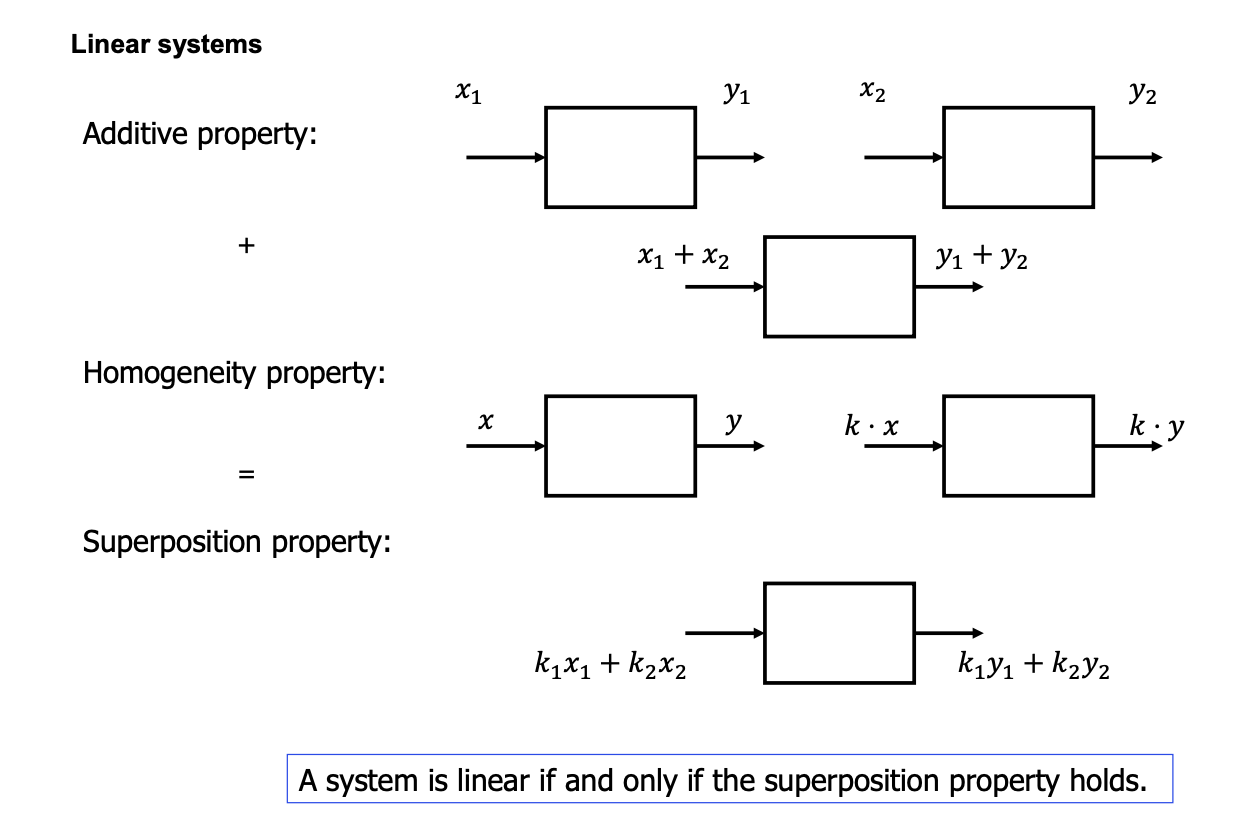

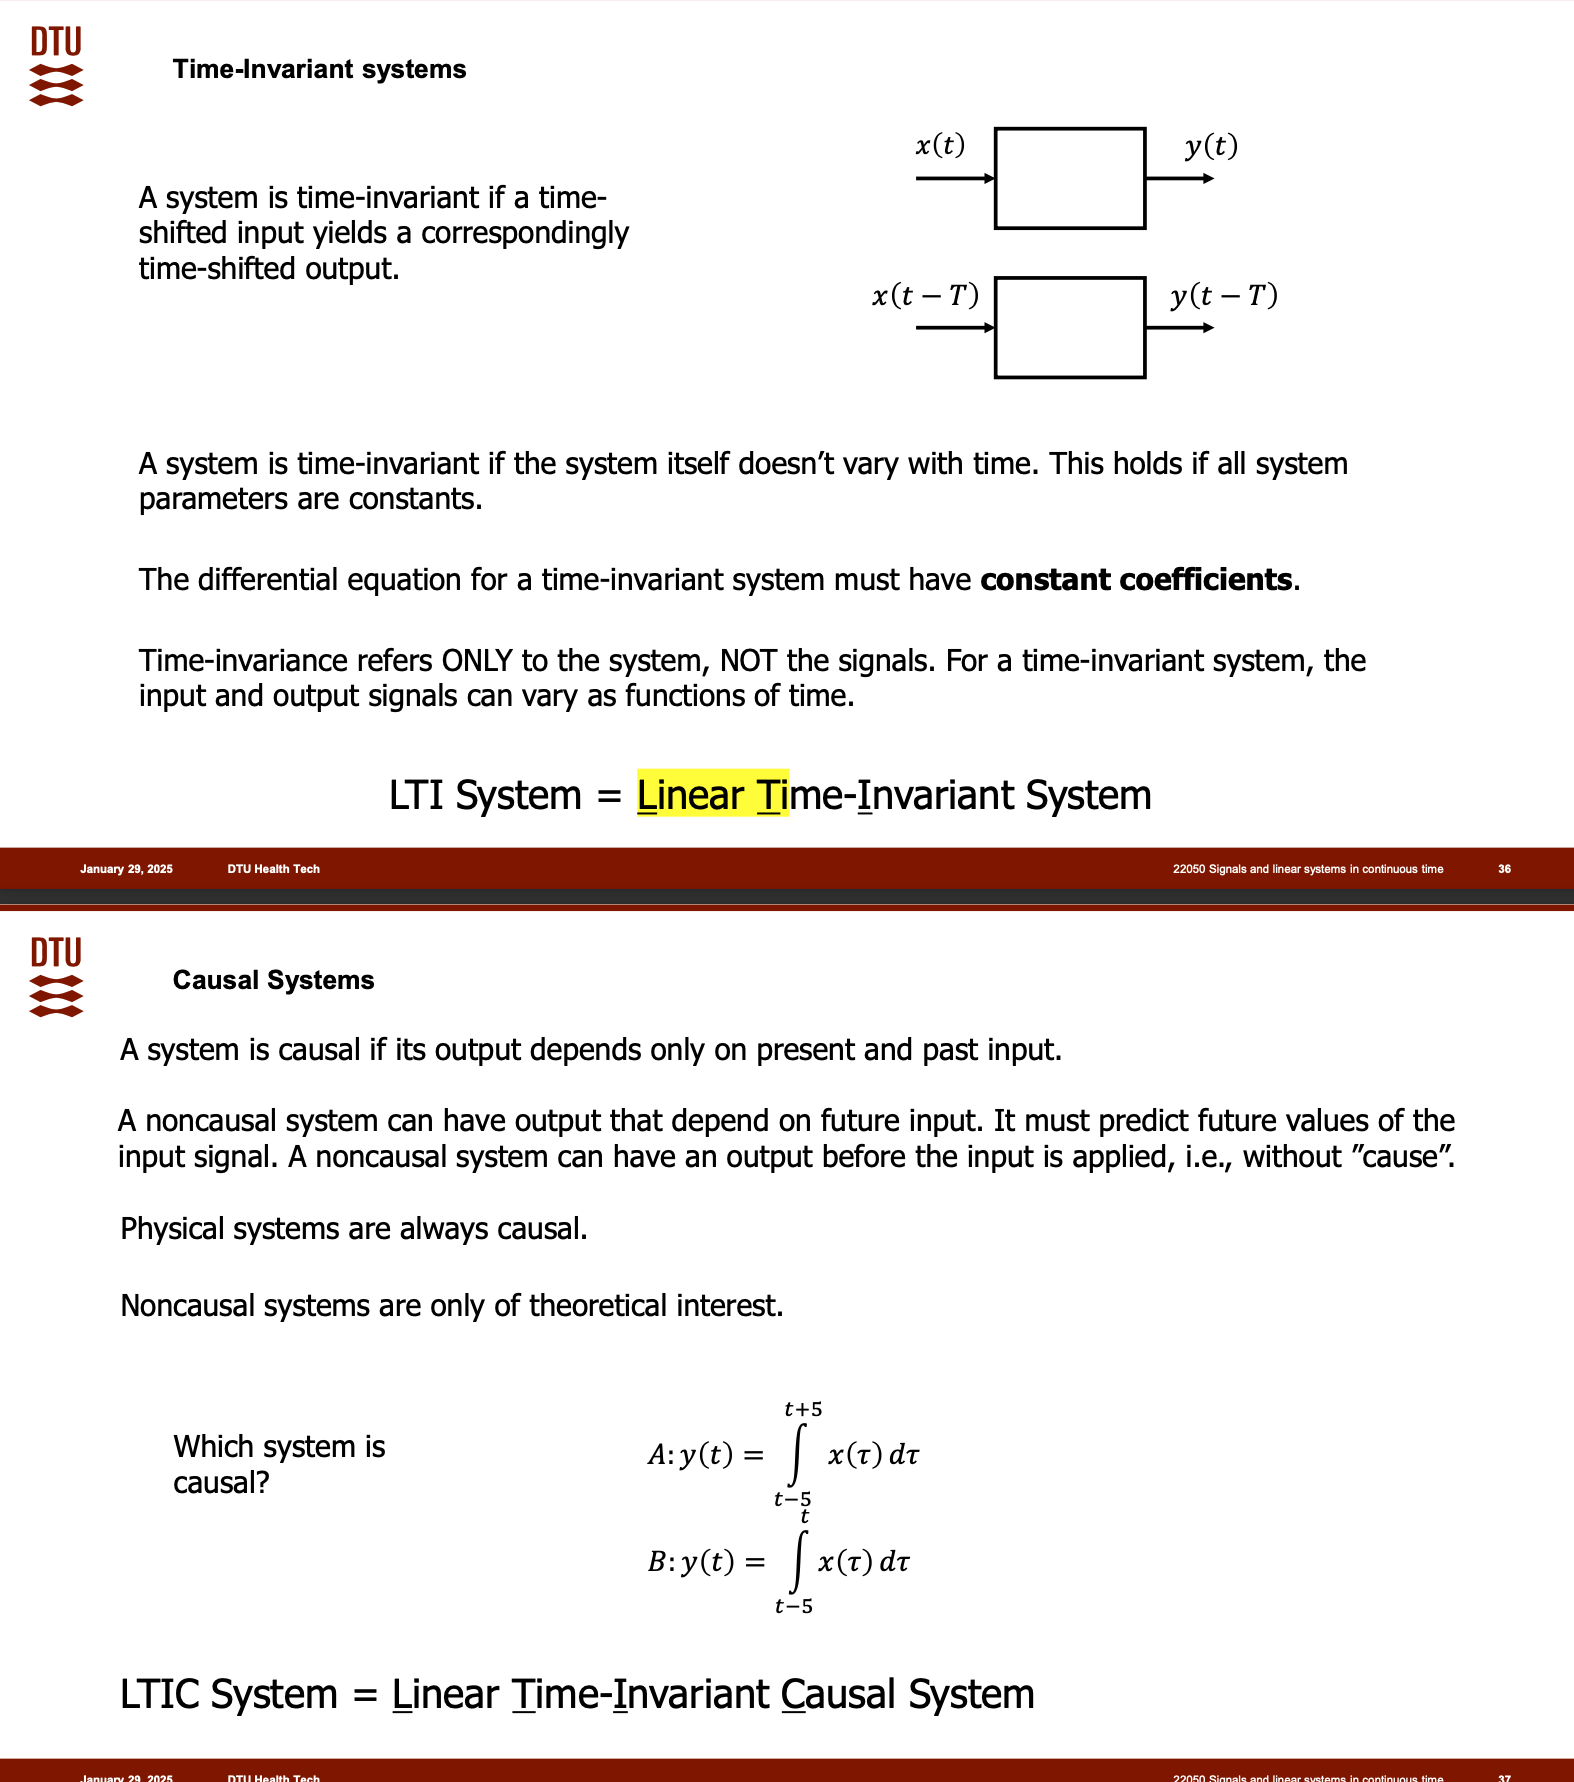

## answer

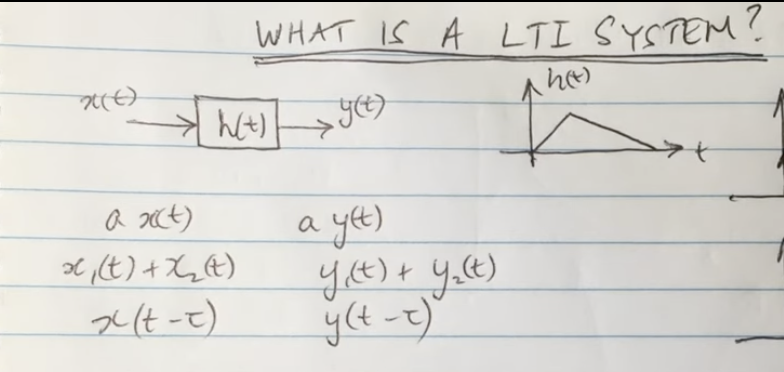

1 : not time-invariant since a_0 is dependent on t

2: not lieanr, since x^2 is there

3: not causal, since x(t + 2) on rhs but y(t) on lhs (ie output is dependent on future input)

## option 4 is the correct answer

# 2. Differentialligning fra kredsløb.

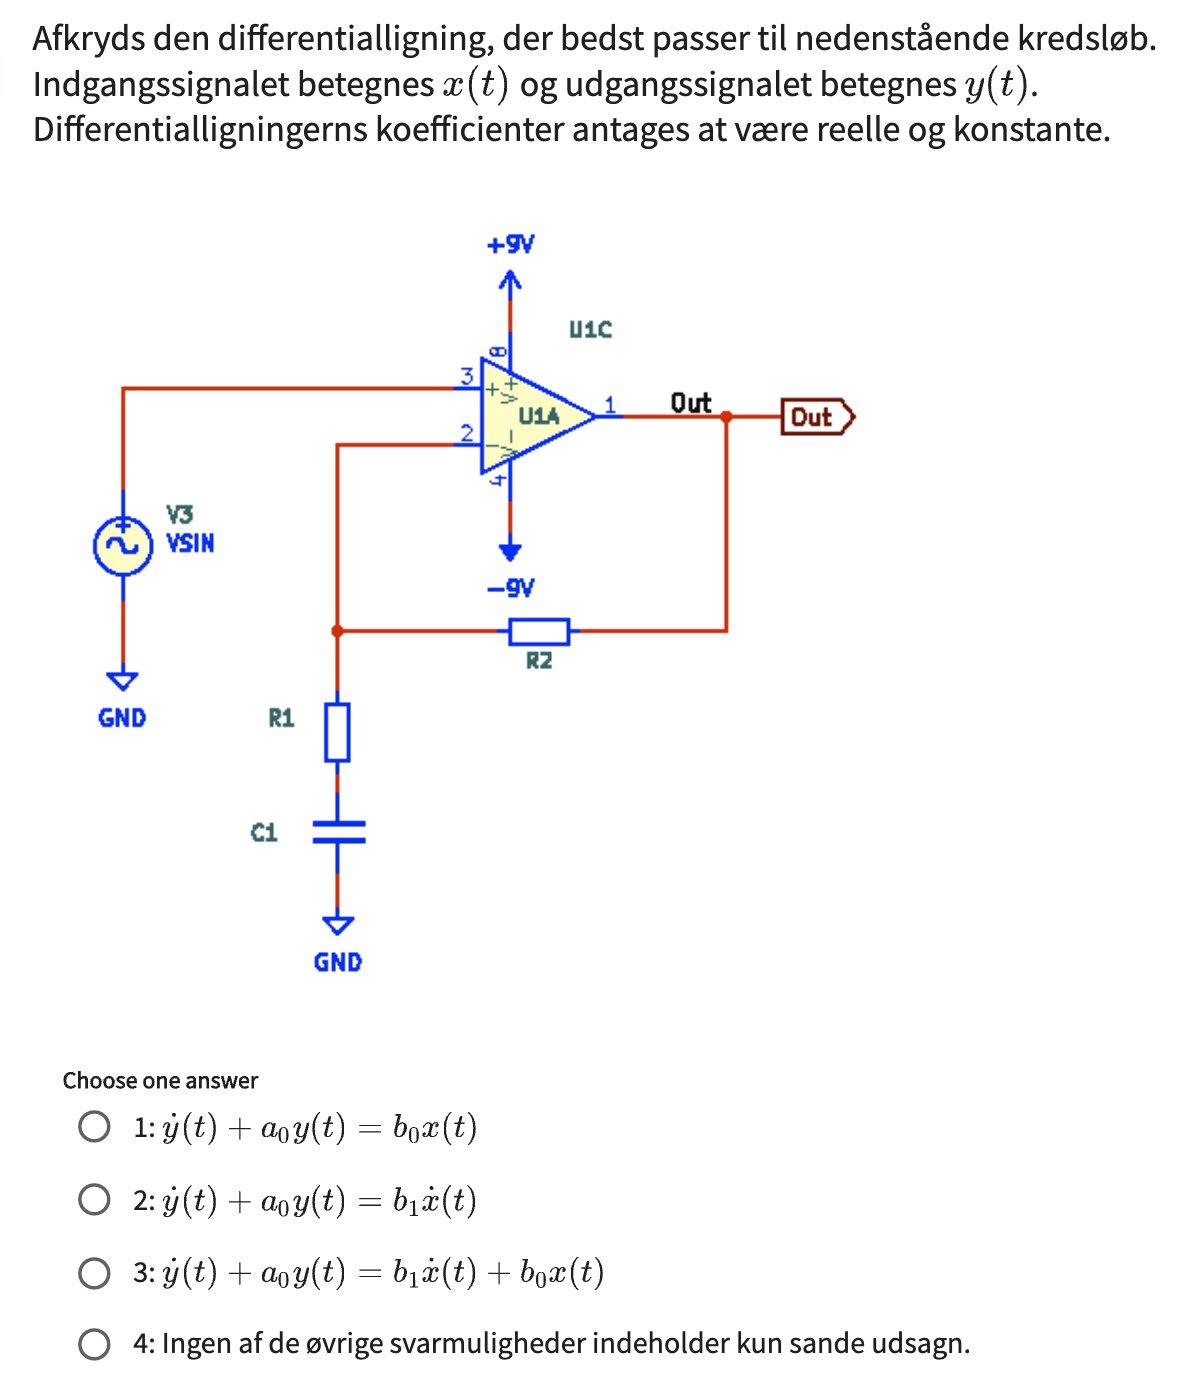

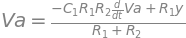

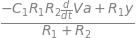

In [94]:
Va, x, y, C1, R1, R2, t = symbols('Va x y C1 R1 R2 t')

eqA = Eq( -((y-Va) / R2) + Va/R1 + C1 * Derivative(Va, t) , 0) # from onenote

# Solve for Va
solutions = solve([eqA], (Va))

# Display the solutions
for var, sol in solutions.items():
    # print(f"{var}: {sol}")
    display(Eq(var, sol))

Va_sol = sol
Va_sol

In [95]:
# Solve for y in terms of Vc
y_expr = solve(eqA, y)[0].simplify()
display(y_expr)

we know for an ideal opamp that V- is equal to V+

- so x(t) = Va

- set up differential equations in **ONENOTE**

## option 4 is the answer (look in onenote)

# 3. Impulsrespons.

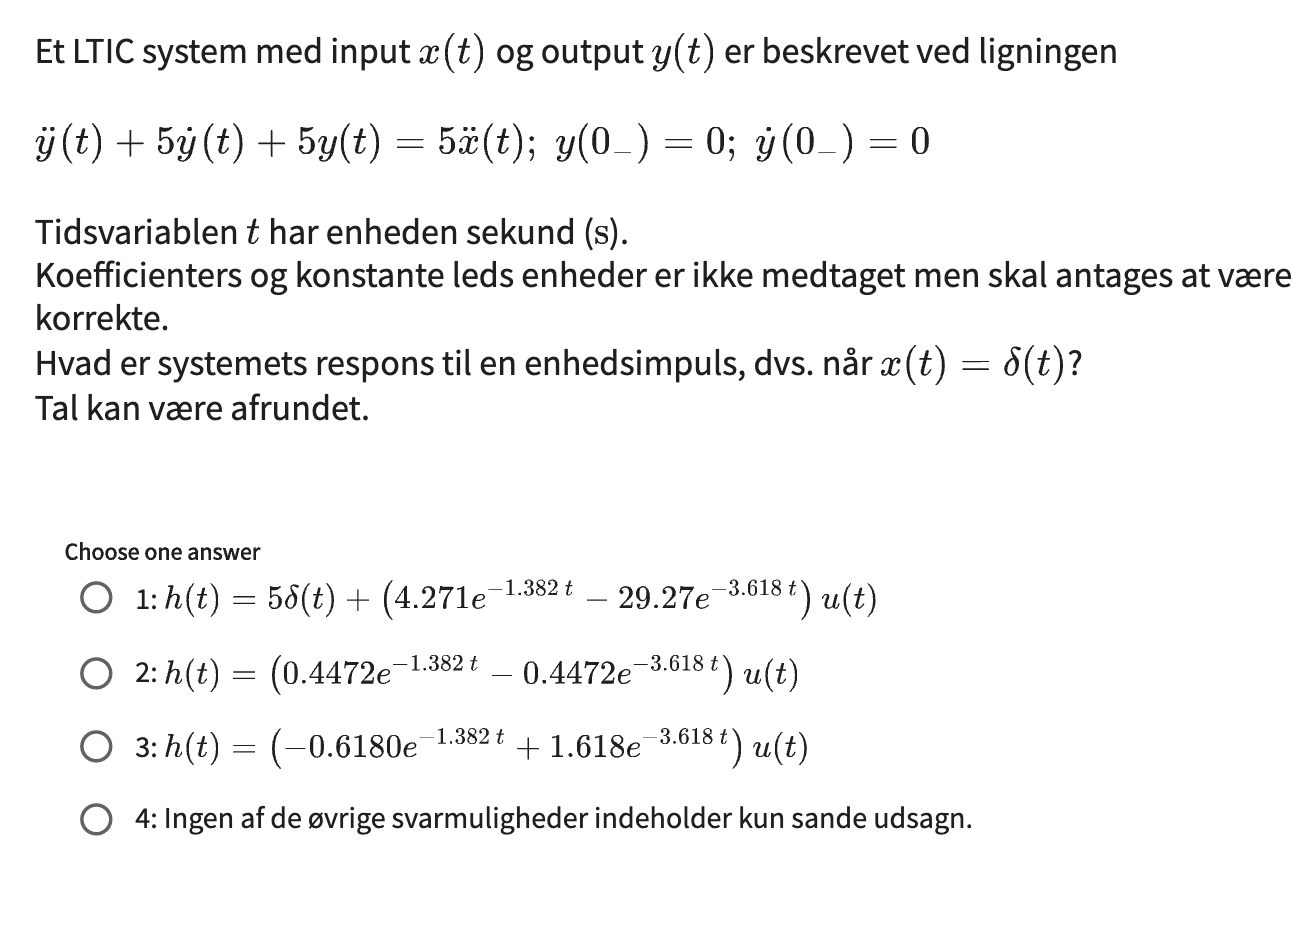

In [96]:
s, t = symbols('s t')

# Define the Laplace-domain impulse response (ie H(s))
Y = 5*s**2 / (s**2 + 5*s + 5)  # 5*s^2 + 0*s^1 + 0  / ( s^2 + 5*s^1 + 5*s^0 )
h = inverse_laplace_transform(Y, s, t)
simplify(h)

In [97]:
simplify(h.evalf())

In [98]:
cosh(sqrt(5)/2).evalf() * 5

In [99]:
# Define transfer function
H = 5 * s**2 / (s**2 + 5*s + 5)

# Inverse Laplace
h = inverse_laplace_transform(H, s, t)

# cleaning it up
h_clean = simplify(collect(expand(h.rewrite('exp').evalf()), exp(t)))
display(h_clean)

### checking roots

In [100]:
print((-(5*t/2) - (sqrt(5)*t / 2)).evalf())
print((-(5*t/2) + (sqrt(5)*t / 2)).evalf())

-3.61803398874989*t
-1.38196601125011*t


In [101]:
s = symbols('s')
roots = solve(s**2 + 5*s + 5, s)
[float(root.evalf()) for root in roots]

the exponents match option 1

## option 1 is correct

## extra

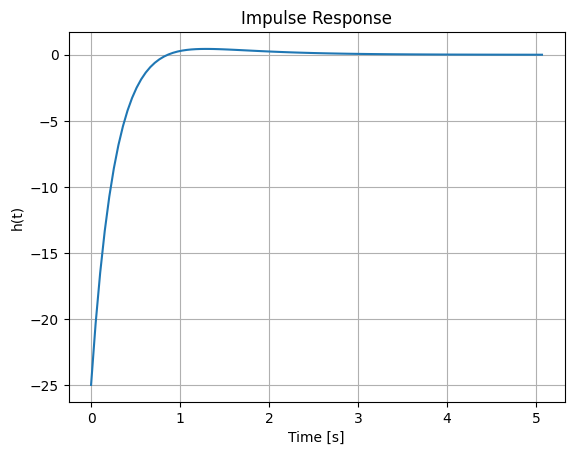

In [102]:
# Transfer function representation H(s) = Num(s) / Den(s)
numerator = [5, 0, 0]  # b2
denominator = [1, 5, 5]  # s^2 + a1*s + a0

# Create system
system = signal.lti(numerator, denominator)

# Time vector
t = np.linspace(0, 0.01, 1000)

# Compute impulse response
t, h = signal.impulse(system) # (time vector, impulse response)

# Plot it
plt.plot(t, h)
plt.title("Impulse Response")
plt.xlabel("Time [s]")
plt.ylabel("h(t)")
plt.grid()
plt.show()

# 

# 4. Impuls- og rampesrespons.

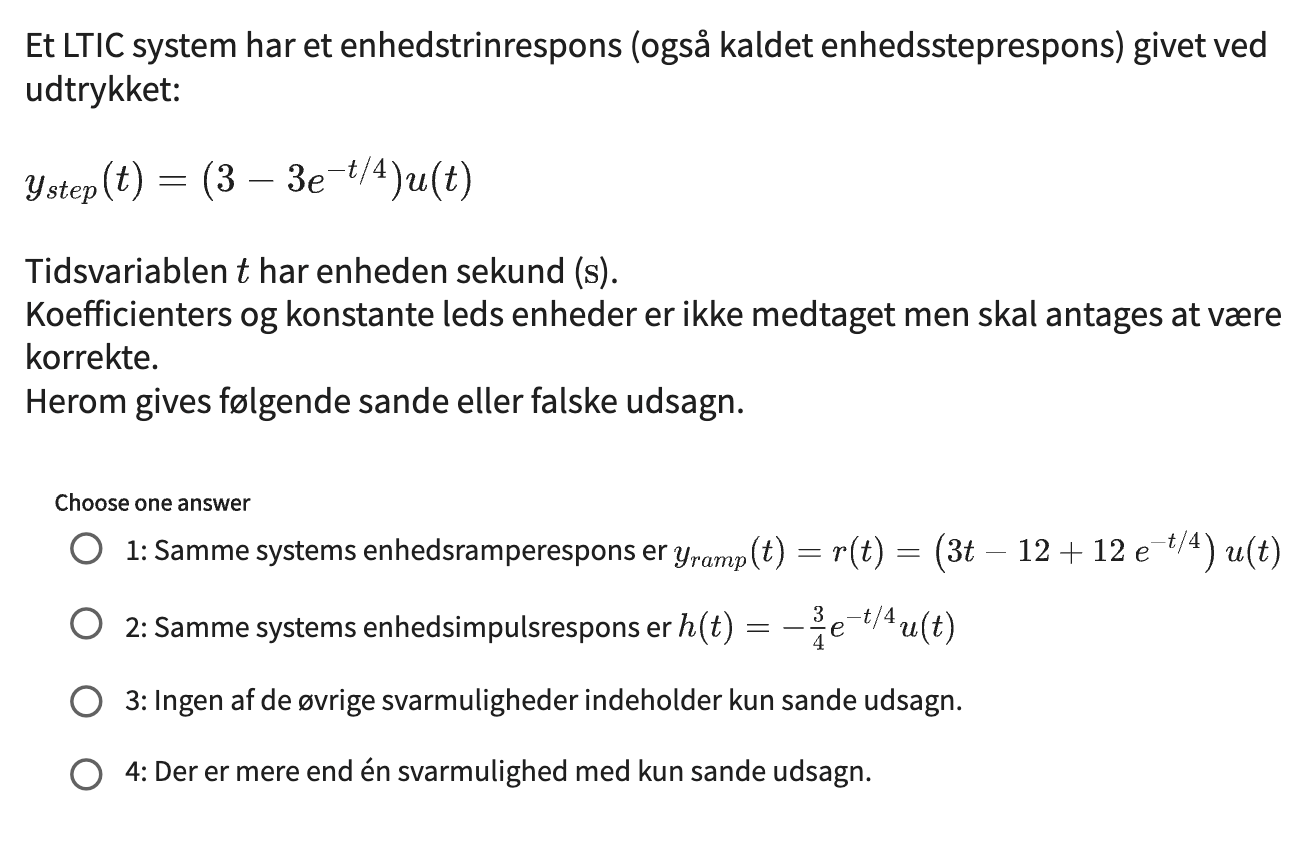

In [103]:
t = symbols('t', real=True)

# Define the step response
ystep = (3 - 3 * exp(-t/4)) * Heaviside(t)

# 1. Ramp response (integral of step)
yramp = integrate(ystep, (t, 0, t))
print("\nRamp response:")
display(yramp)

# 2. Impulse response (derivative of step)
h = diff(ystep, t)
print("Impulse response:")
display(h)


Ramp response:


Impulse response:


## option 1 matches (ramp)

# 5. Foldning.

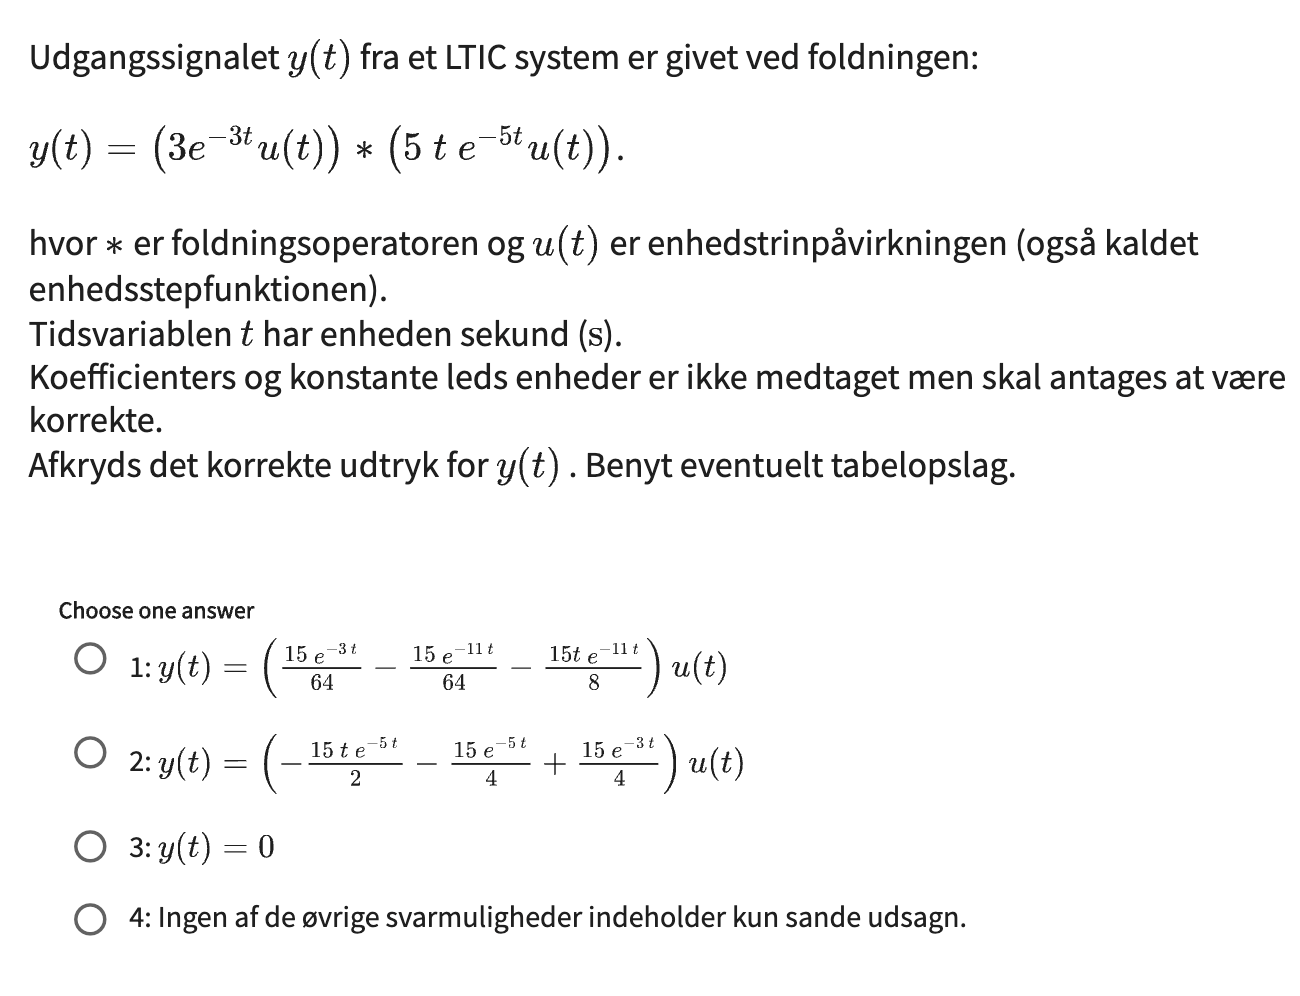

the convolution of f1 with f2 is given :

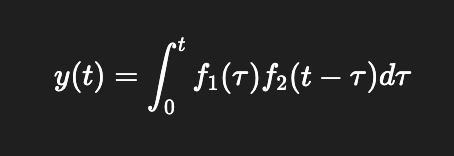

In [ ]:
t, tau = symbols('t tau', real=True)

f1 = 3 * exp(-3*tau)
f2 = 5 * (t - tau) * exp(-5*(t - tau))

# Convolution integral
y = integrate(f1 * f2, (tau, 0, t))
y = y * Heaviside(t)
display(y.simplify().expand().collect(Heaviside(t)))

## option 2 is correct

# 

# 6. Systemkarakteristik.

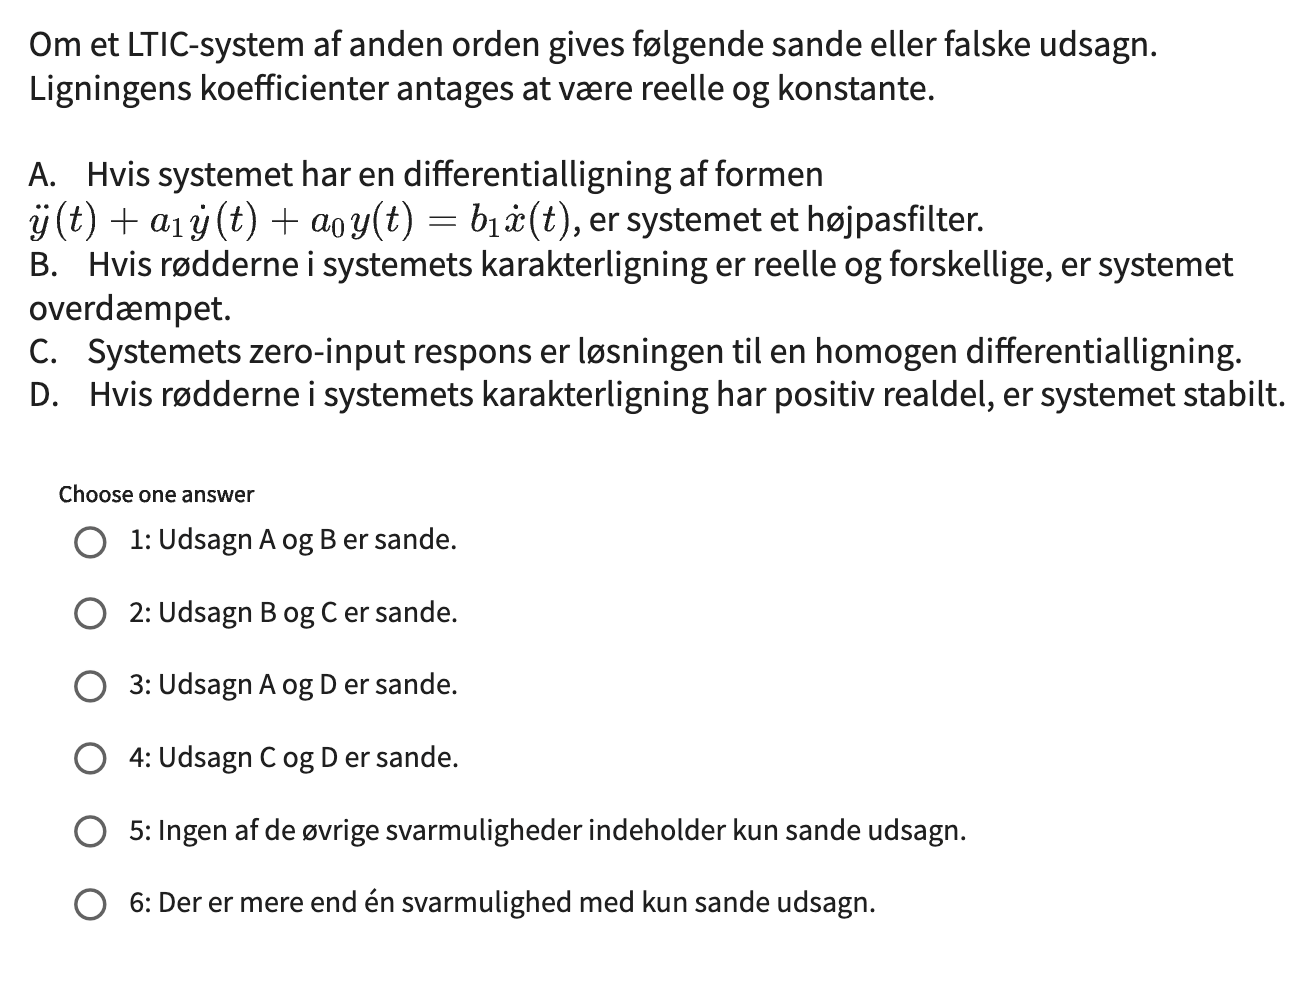

### A is wrong (its a bandpass)

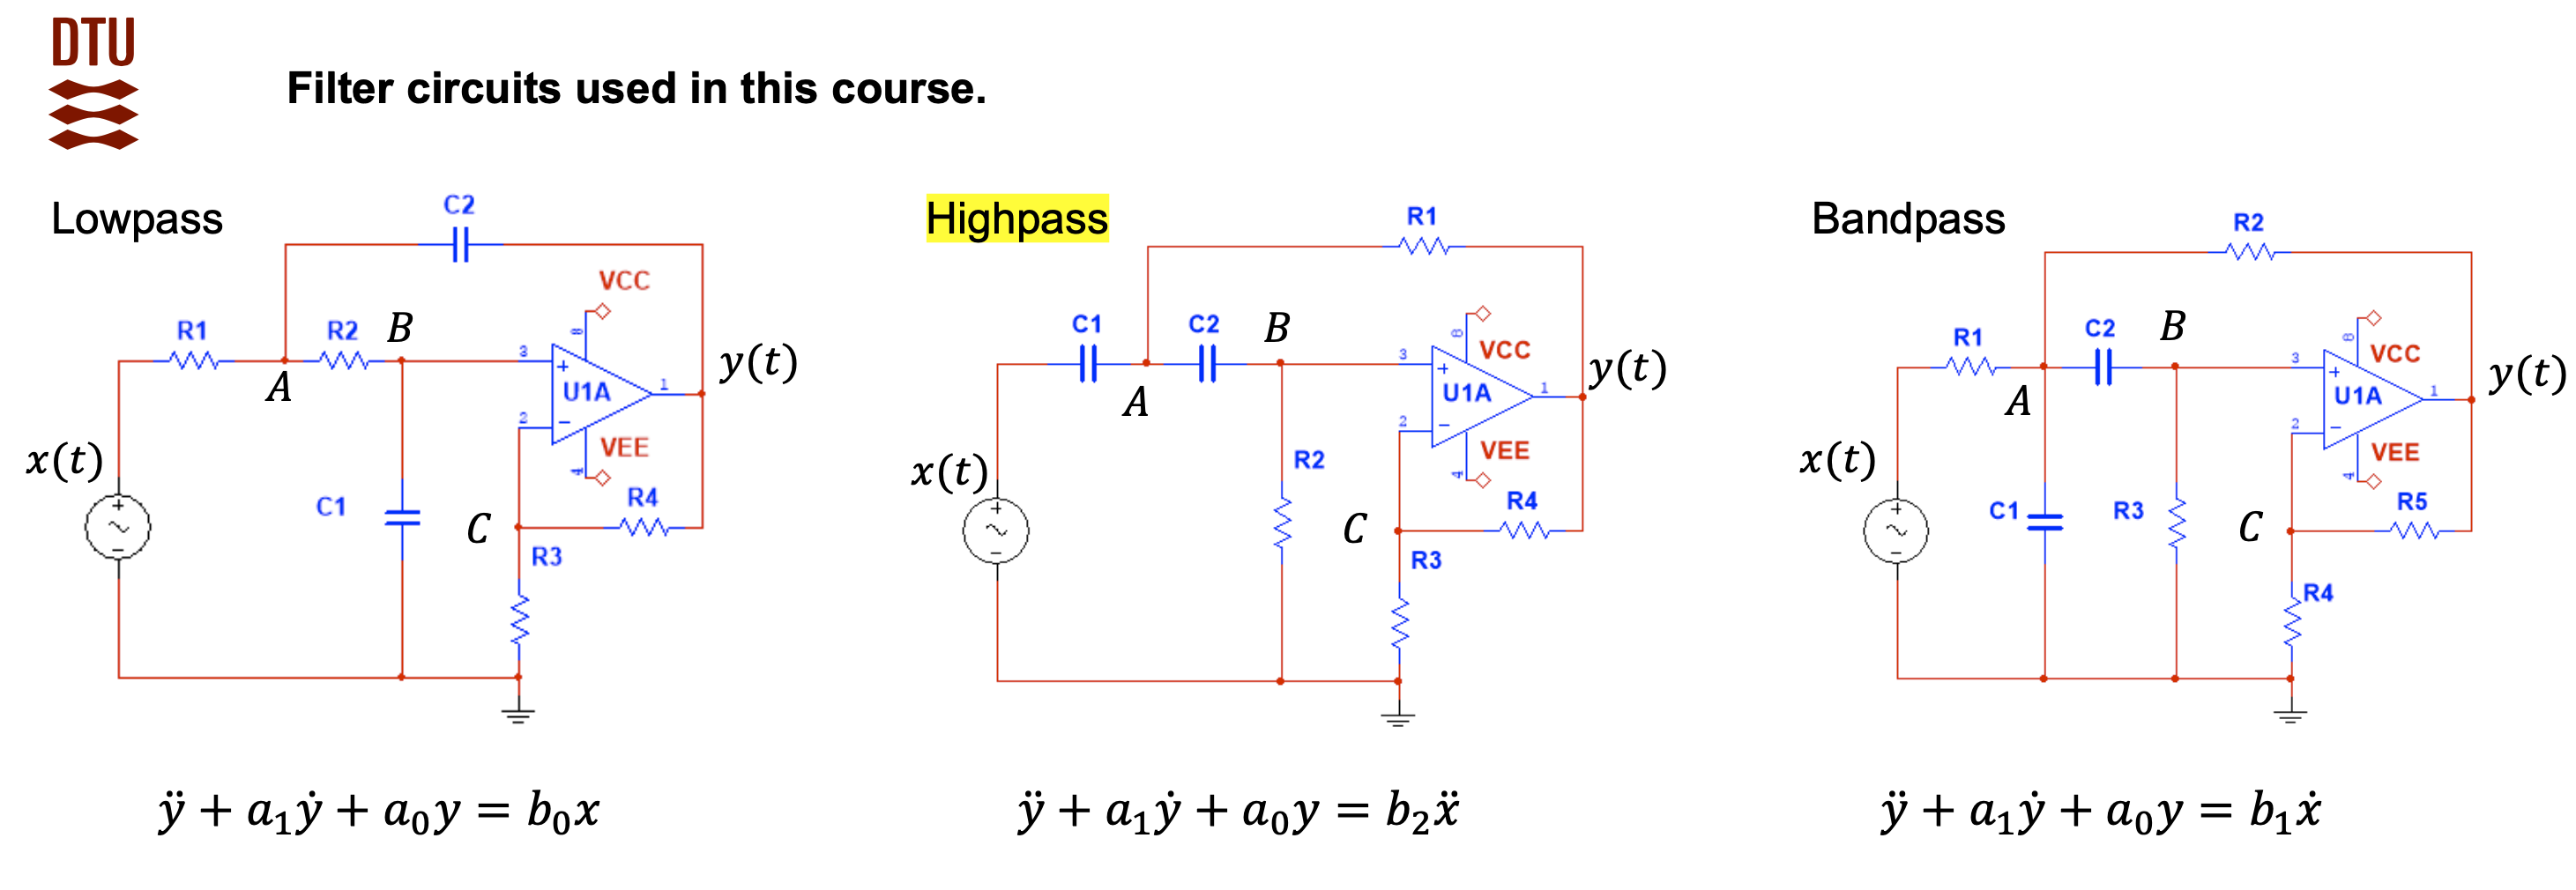

### B is correct

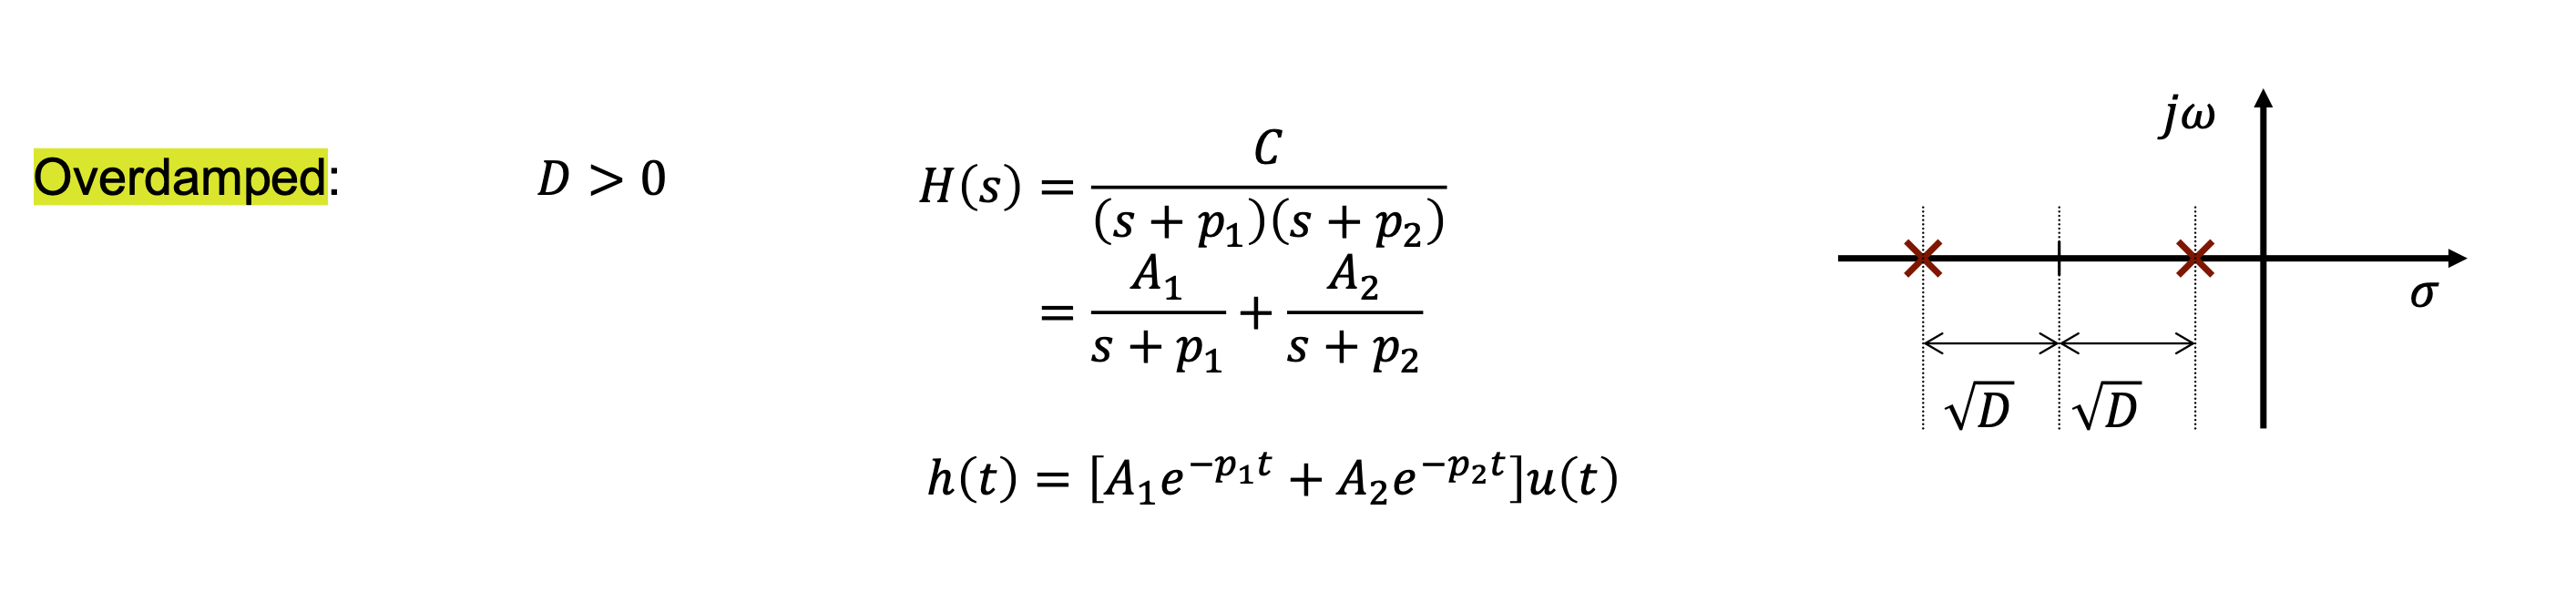

### C is correct

we can assume that decomposition holds

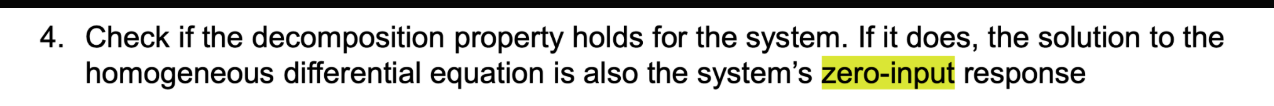

### D is wrong

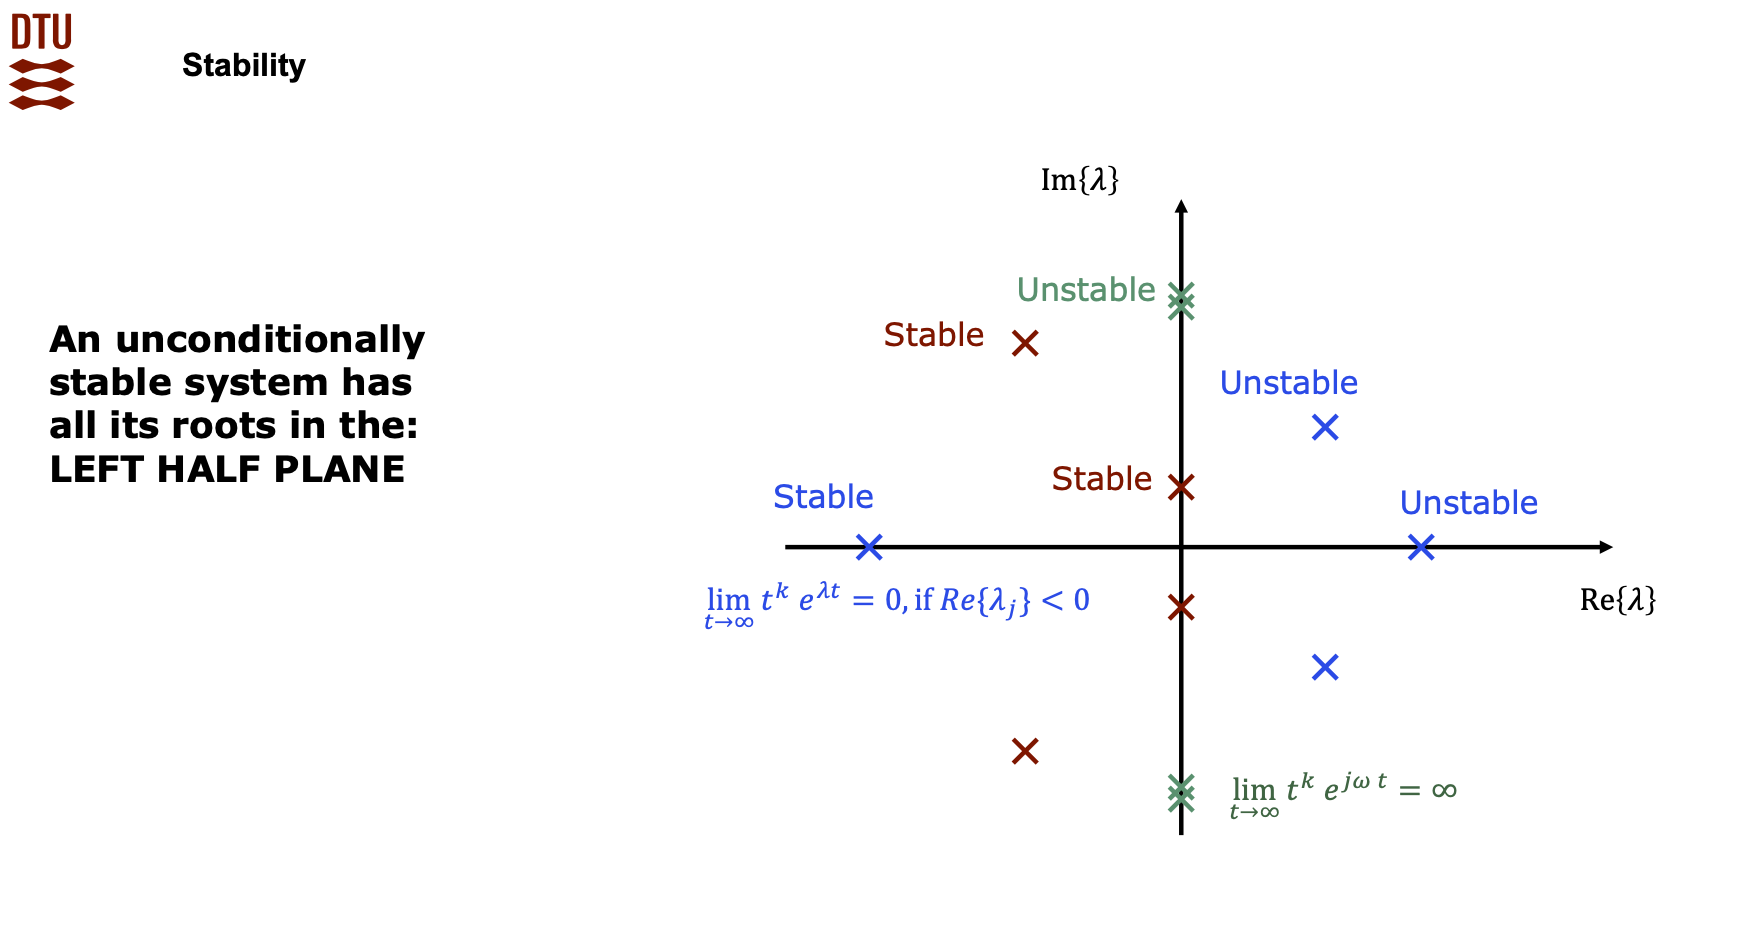

## option 2 is correct

# 7. Fourier-rækken.

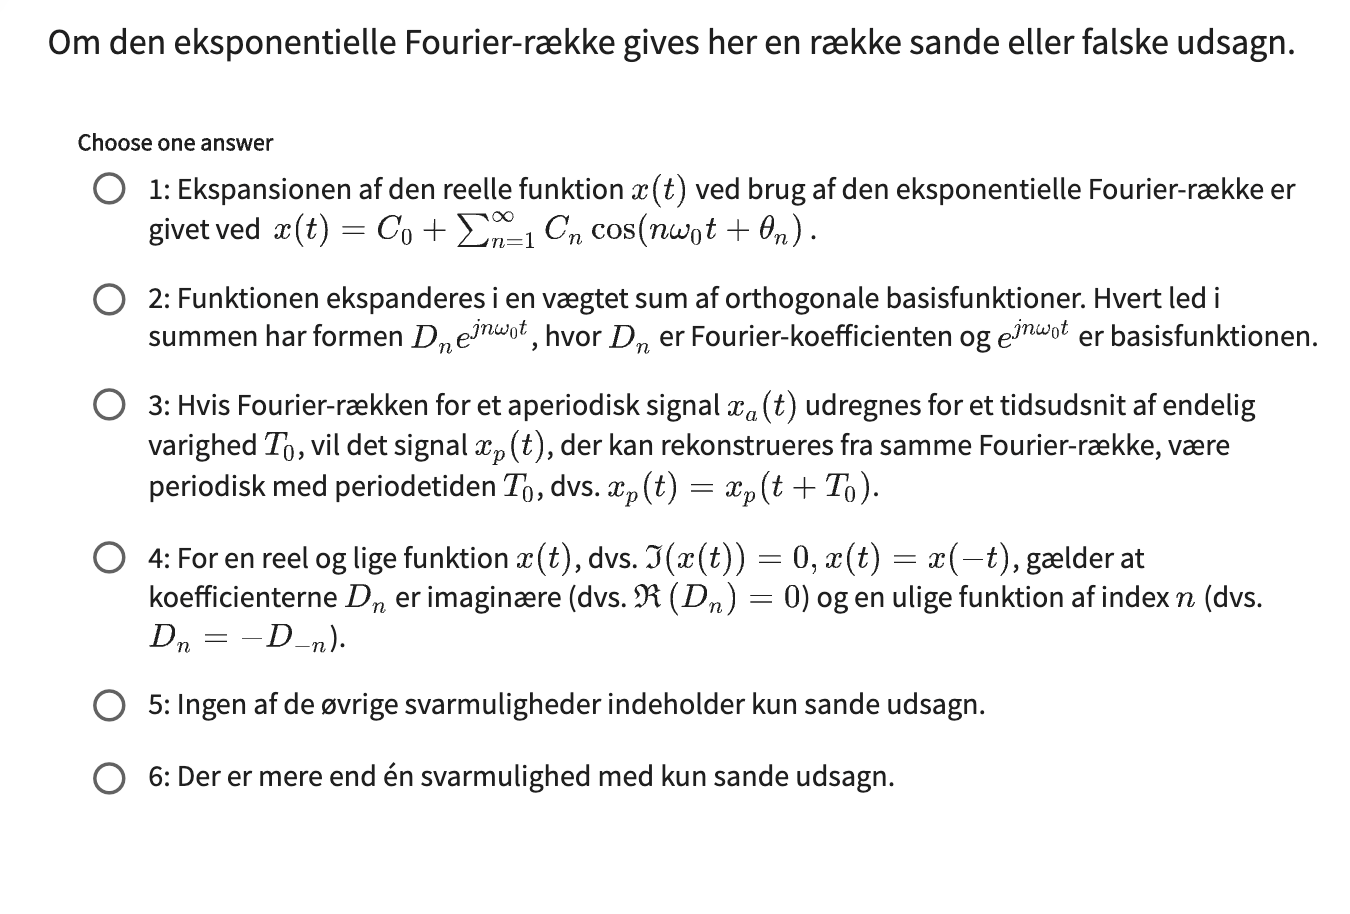

### option 1 wrong

- given expr is a trigonometric expansion

complex looks like this (ie, complex (euler) coefficients)

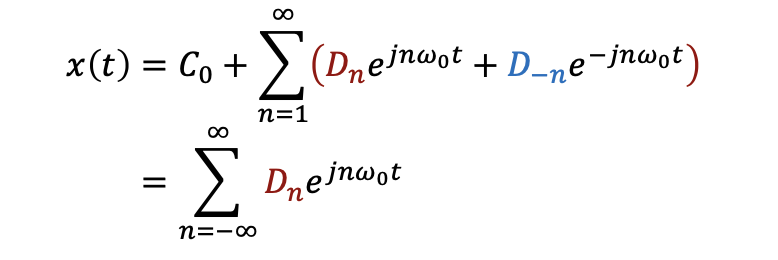

### option 2 is correct

### 3 is correct

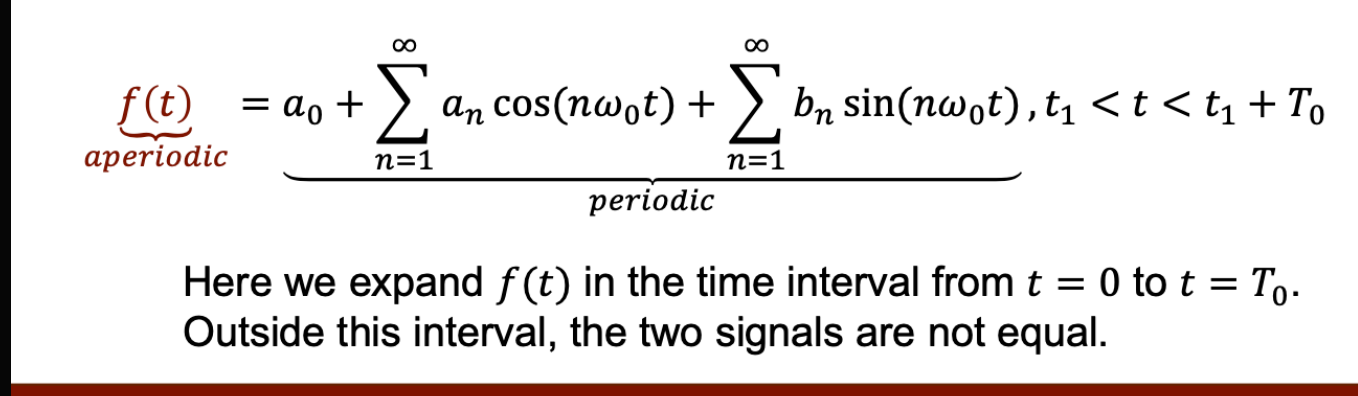

## 6 is the correct option (more than one correct)

# 8. Fourier-transformation.

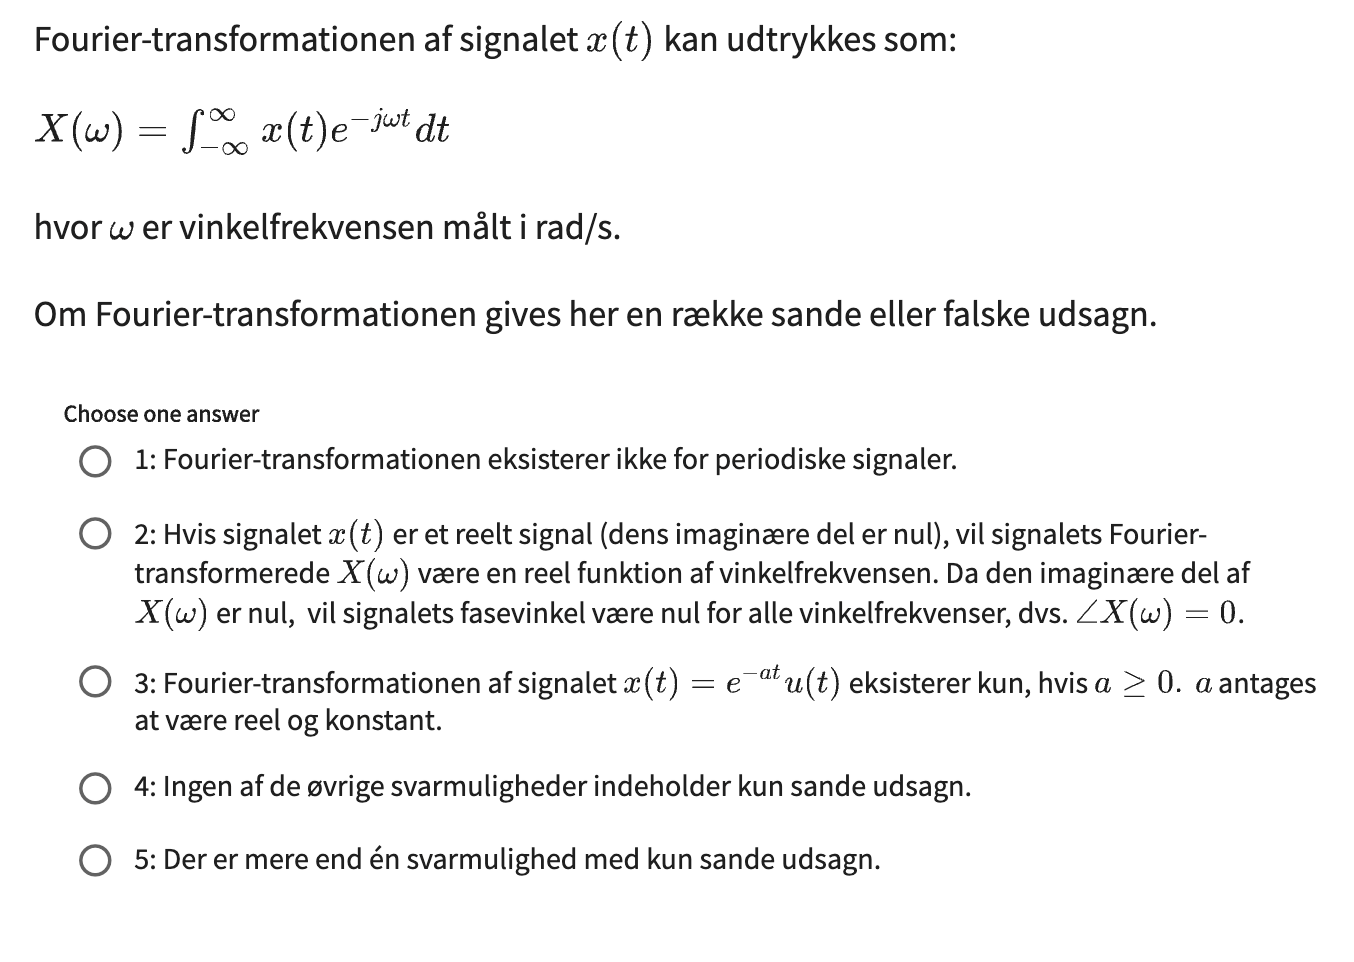

## 1 wrong

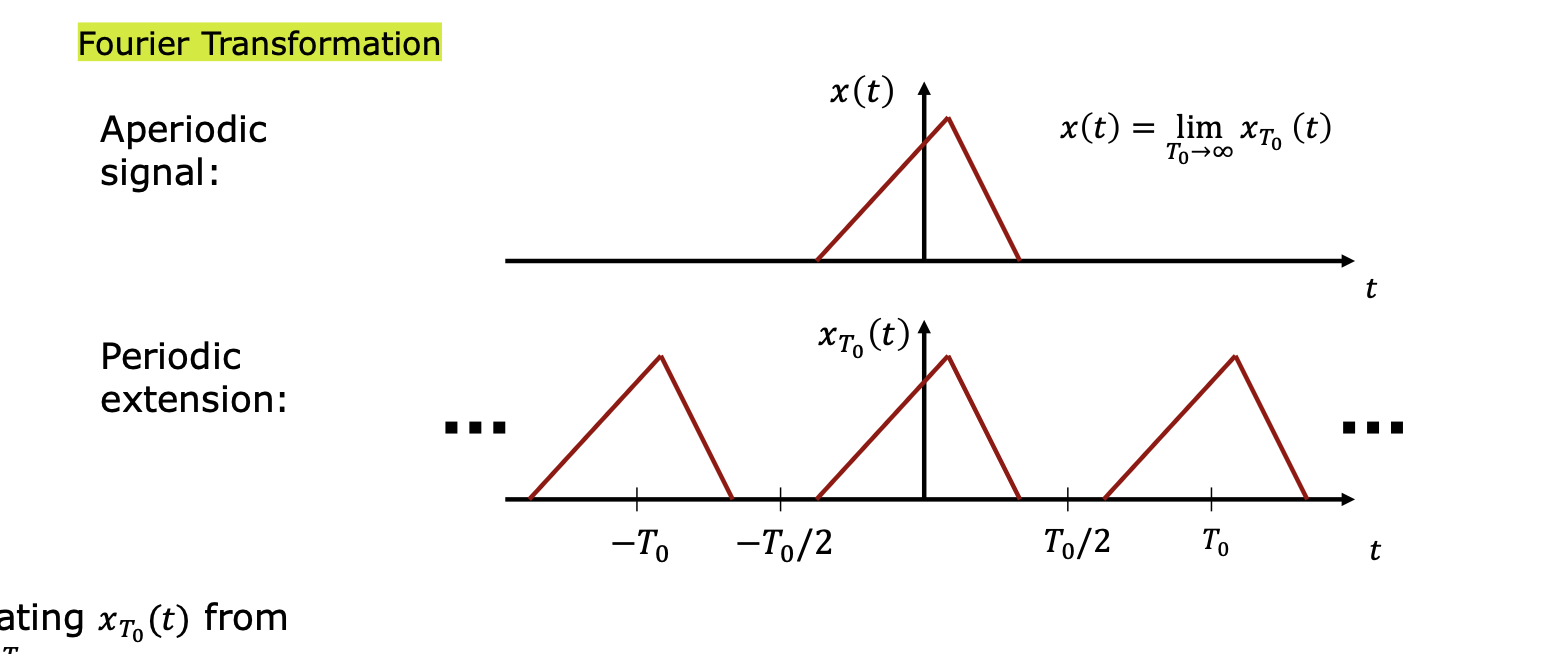

## 2 false

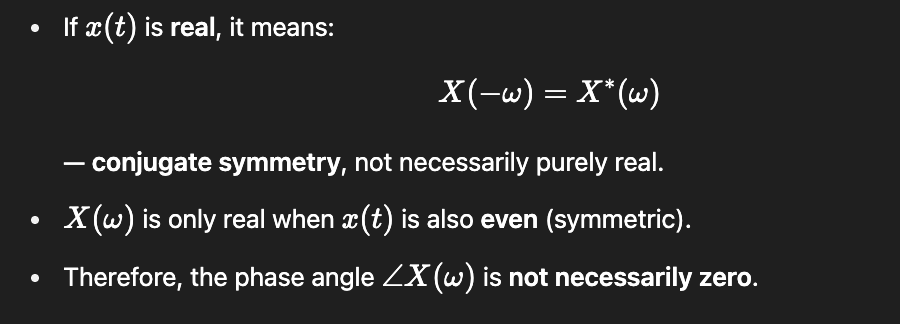

## 3 correct

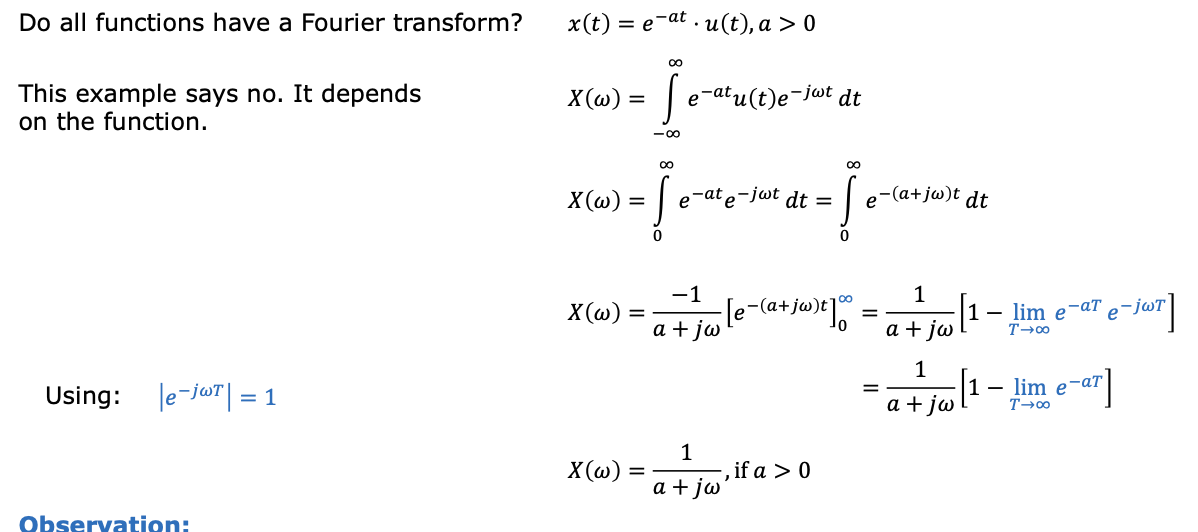

## 3 is correct

# 9. Fourier-transformation.

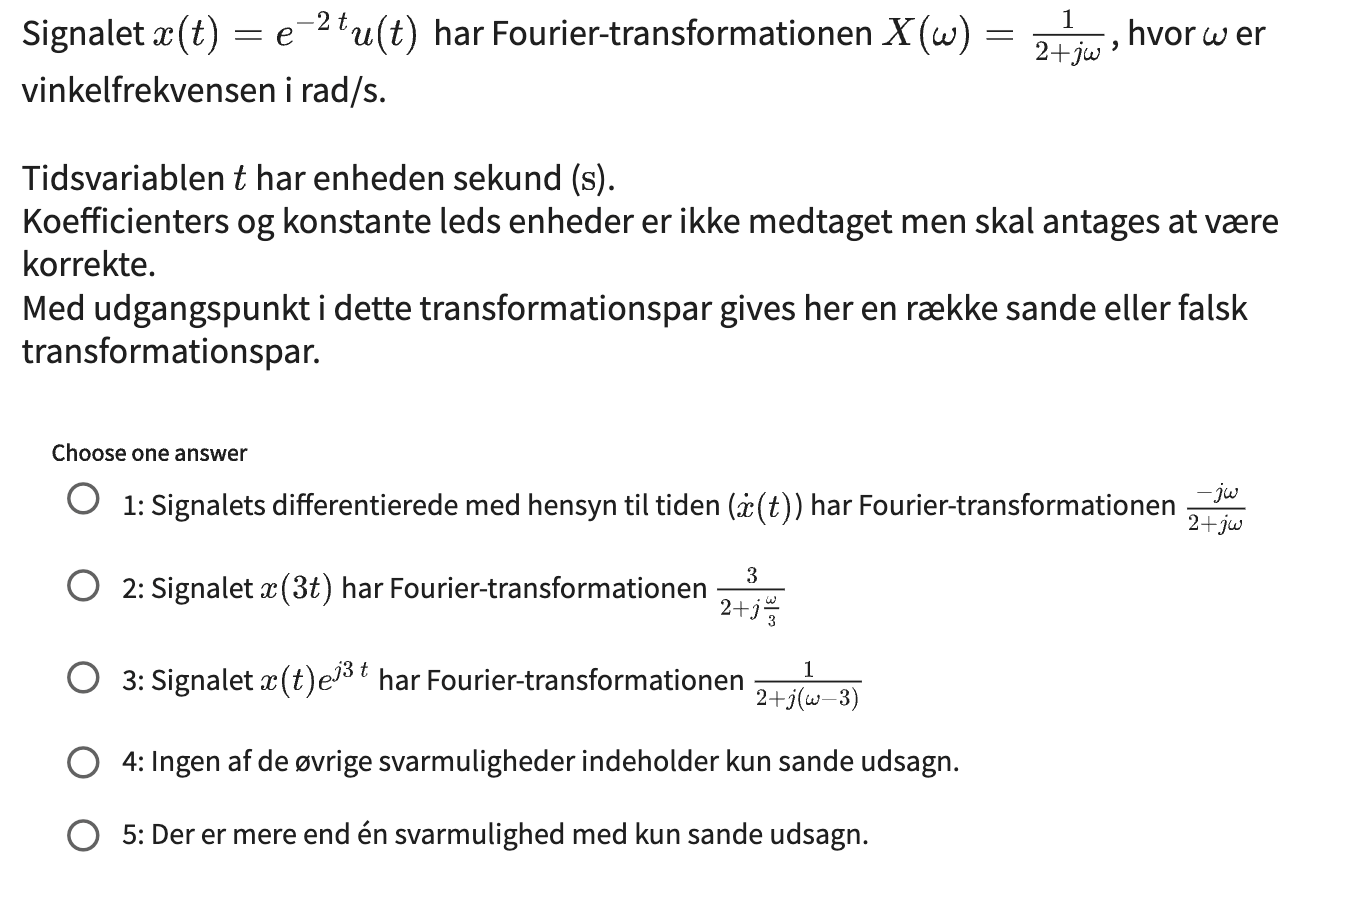

In [105]:
t = symbols('t')
w = symbols('omega', real=True)  # for angular frequency ω

x_t = exp(-2*t) * Heaviside(t)
display(x_t)

X_w = fourier_transform(x_t, t, w)
display(X_w)

## 1 is wrong

In [106]:
x_t_diff = diff(x_t, t)
display(x_t_diff.simplify())

X_w_diff = fourier_transform(x_t_diff, t, w)
display(X_w)

## 2 is wrong

In [107]:
x_t_3 = x_t.subs(t, 3*t)
display(x_t_3)

X_w_3 = fourier_transform(x_t_3, t, w)
display(X_w_3)
display(X_w_3.expand())

## 3 is correct

In [108]:
x_t_j3 = x_t * exp(I*3*t)
display(x_t_j3)

X_w_j3 = fourier_transform(x_t_j3, t, w)
display(X_w_j3)

## 3 is correct

# 10. Fourier-transformation.

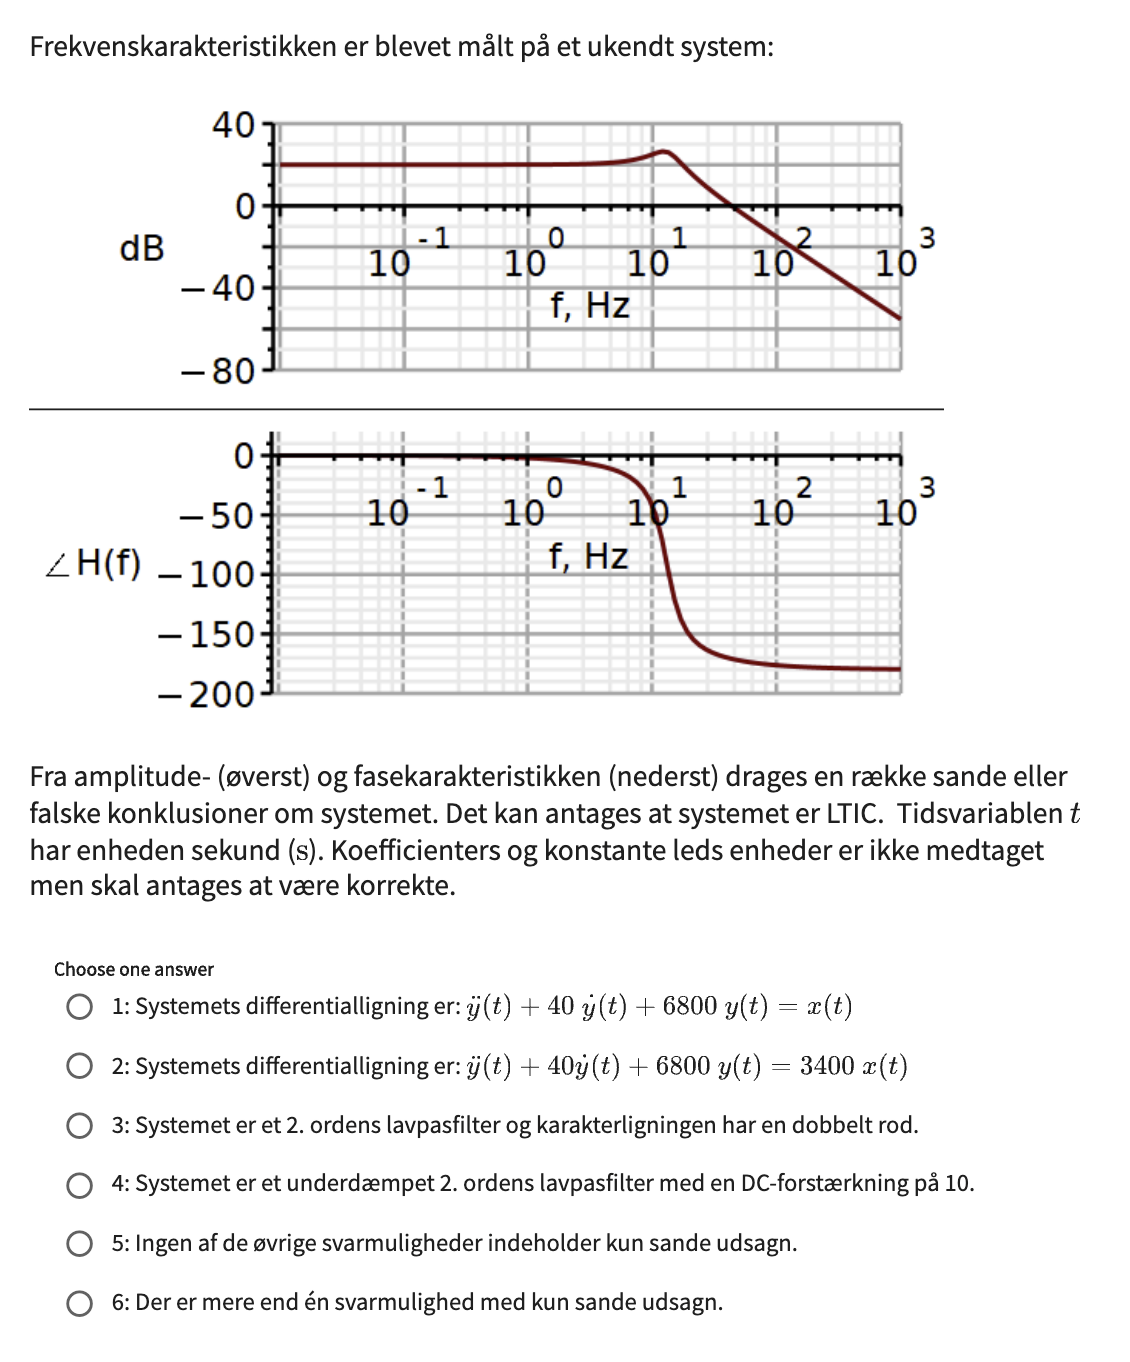

# 15. Steprespons

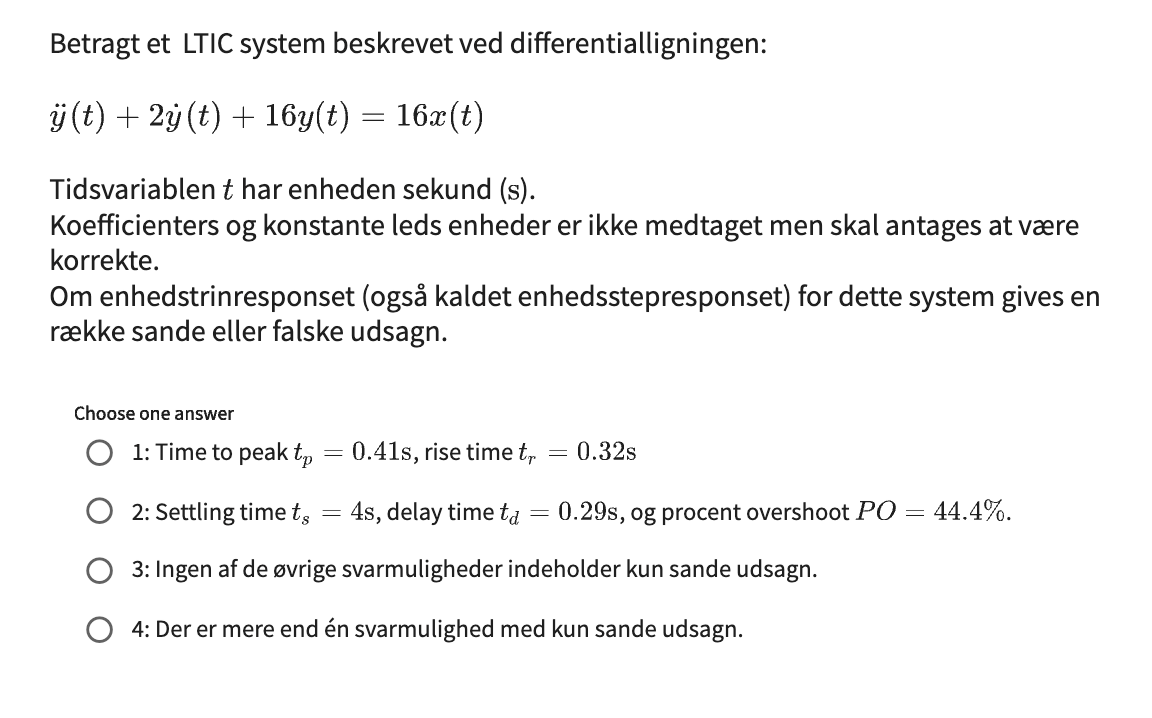

## 1 wrong (t_p > 0.41s) ; 2 wrong ( t_s > 4s)

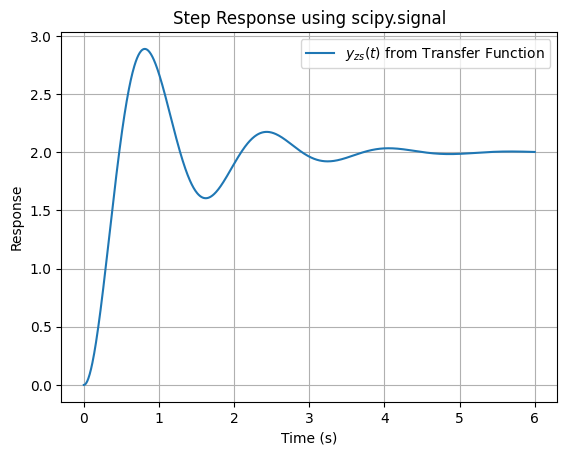

In [110]:
# Define the transfer function H(s) = b0 / (s^2 + a1*s + a0)
num = [16]        # Numerator coefficients 
den = [1, 2, 16]  # Denominator coefficients

# Create an LTI system
system = signal.lti(num, den)

# Generate time vector
t = np.linspace(0, 6, 1000)

# Compute step response$
# t_out, y_out = signal.step(system, T=t)
t_out, y_out = signal.lsim(system, U=2*np.ones_like(t), T=t)[0:2]  # valid?
# t_out, y_out = signal.lsim(system, U=2, T=t)[0:2]  # valid?

# Plot the response
plt.plot(t_out, y_out, label=r'$y_{zs}(t)$ from Transfer Function')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response using scipy.signal')
plt.legend()
plt.grid()
plt.show()

## 3 correct

# 16. 